In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn

In [2]:
selected_columns = ['workclass', 'relationship', 'education', '50K', 'marital-status', 'occupation']
num_features = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
cat_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country', '50K']
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', '50K']

In [3]:
df_test_G2 = pd.read_csv("../Fair-Explainable-Analytics-Seminar/data_great_impute/df_test_2_great_impute.txt", header=0, names=columns)
D2_test = pd.read_csv("../Fair-Explainable-Analytics-Seminar/data/D_test.csv", header=0, names=columns)
display(df_test_G2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,54.0,Private,175262.0,7th-8th,4.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,17.0,Private,295991.0,10th,6.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
2,60.0,Private,240521.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,7298.0,0.0,40.0,United-States,>50K
3,26.0,Private,236068.0,Some-college,10.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,20.0,United-States,<=50K
4,35.0,Private,186934.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688.0,0.0,50.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,33.0,Private,374905.0,HS-grad,9.0,Divorced,Sales,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K
6509,41.0,Private,167106.0,Bachelors,13.0,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,3103.0,0.0,35.0,Philippines,>50K
6510,60.0,Private,223696.0,1st-4th,2.0,Divorced,Craft-repair,Not-in-family,Other,Male,0.0,0.0,38.0,Dominican-Republic,<=50K
6511,31.0,Private,101562.0,HS-grad,9.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,55.0,United-States,<=50K


Note that the test set with the imputed values by GreaT was done by our superviser and sent to us.

In [1]:
from sklearn import preprocessing

# Label encodes the set of the features to be used for imputation
def label_encoding(df, columns): #df: data frame (processed data), columns: list (features to be encoded)
    
    encoders = dict()
    for col_name in columns:
        series = df[col_name]
        label_encoder = preprocessing.LabelEncoder()
        df[col_name] = pd.Series(
            label_encoder.fit_transform(series[series != "NaN"]),
            index=series[series != "NaN"].index
        )
        encoders[col_name] = label_encoder
    return encoders # Returns a dictionary


## Evaluation

Now, we have two distant datasets: D (without imputed) and D' (with imputed values by Great and represented as df). Firstly, we will drawn some conclusions based on the histograms between D and D'. Note that is only worthy to plot the histograms of the features where we removed values and imputed them with the GReaT.

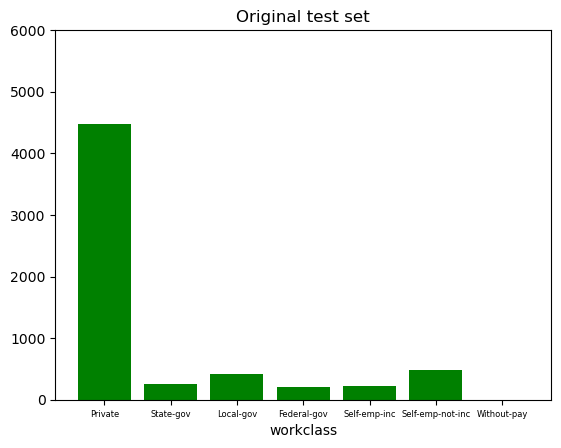

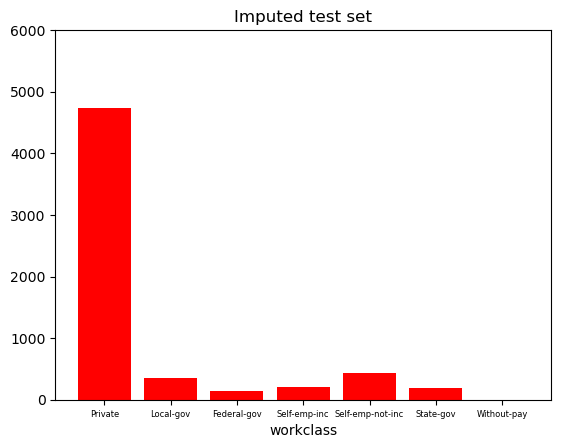

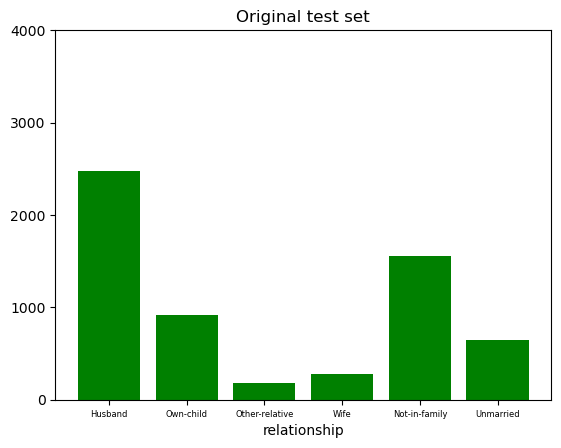

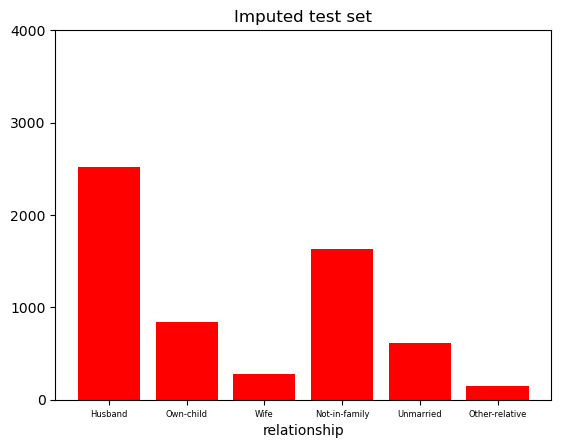

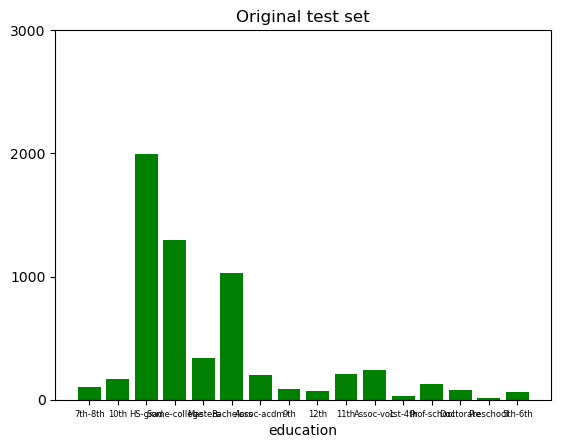

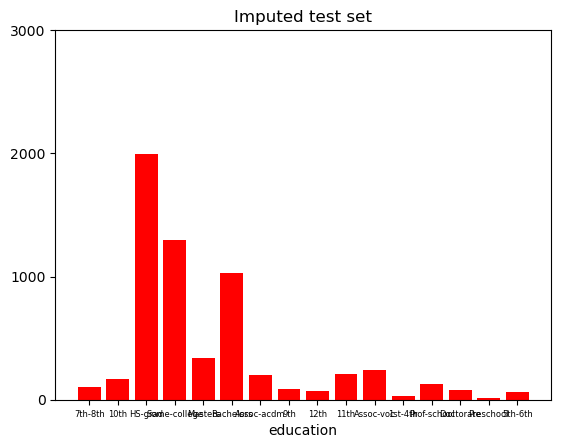

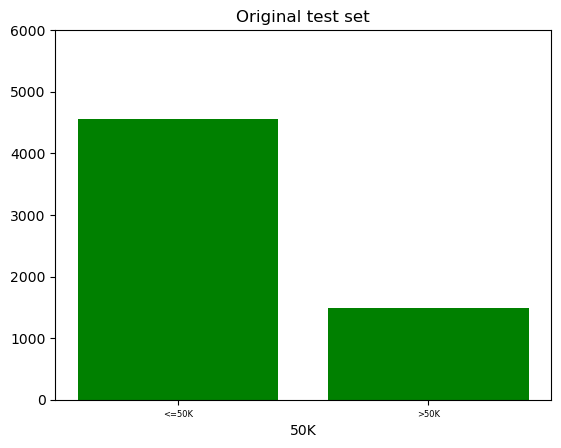

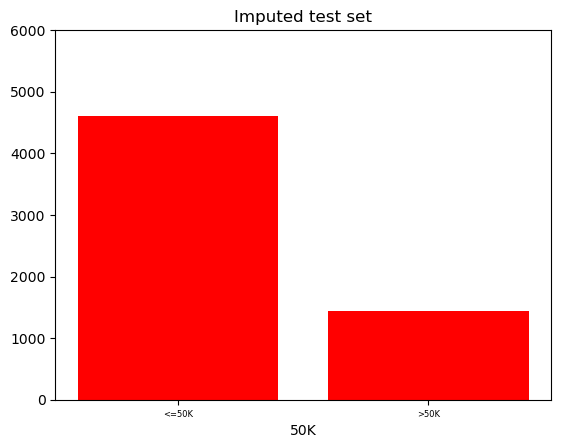

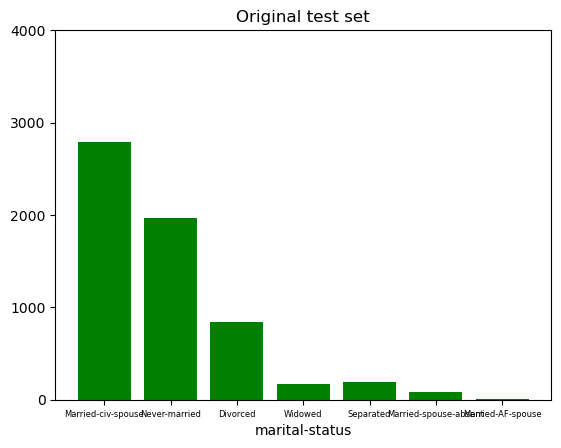

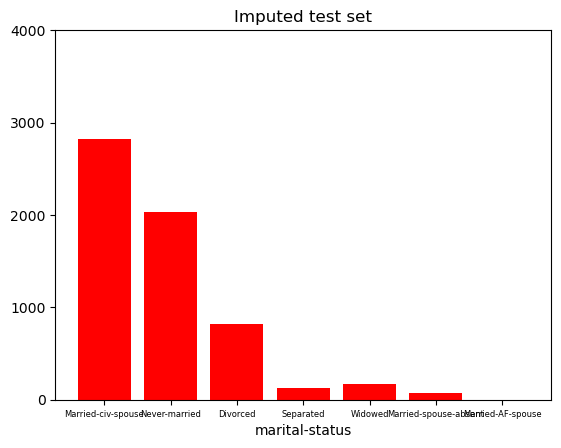

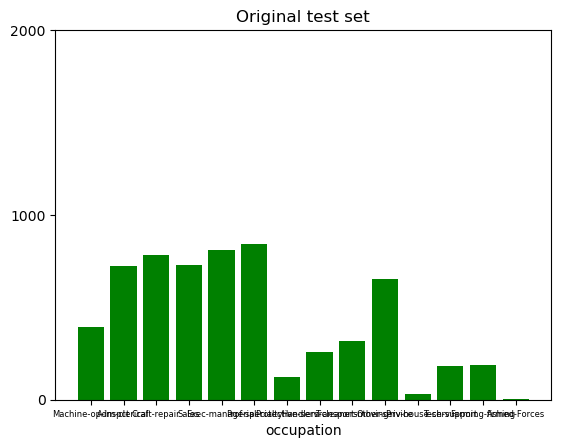

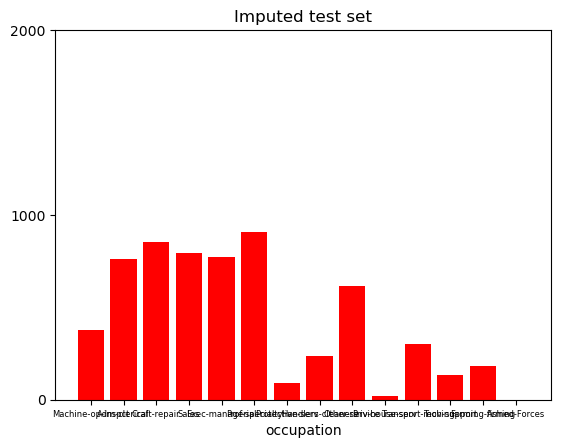

In [5]:
# Histograms: Categorical features

def counts(a): #Function to obtain the counts to each value of the categorical variables
    l={}
   
    for i in a:
        ind=0
        for j in l:
           
            if i==j:
                l[i]+=1
                ind=1
   
        if ind==0:  #not yet in the dictionary
            l[i]=1
           
    return l
           
       
for i in selected_columns: #columns where we removed values to then impute them
    for j in cat_features:
        if i == j: #to make the histogram of categorical features with imputed values:
            
            d1=counts(D2_test[i])
            labels=[]
            count=[]
            for k in d1:
                labels.append(k)
                count.append(d1[k])
            
            hist1 = plt.bar(labels, count, color = "green")
            plt.title("Original test set")
            plt.xlabel(i)
            plt.xticks(fontsize=6)
            plt.yticks(np.arange(0, max(count) + 2000, 1000))
            a = max(count)
            
            plt.show()

        
            
            d2=counts(df_test_G2[i])
            labels=[]
            count=[]
            for k in d2:
                labels.append(k)
                count.append(d2[k])
            
            hist2 = plt.bar(labels, count, color = "red")
            plt.title("Imputed test set")
            plt.xlabel(i)
            plt.xticks(fontsize=6)
            plt.yticks(np.arange(0, a + 2000, 1000))
            
            plt.show()
            

Now, we will measure the quality of the imputation by the accuracy and the mean squared error on the test set.

In [6]:
# Metric: Accuracy

from sklearn.metrics import accuracy_score

# label encoding categorical features
label_encoding(df_test_G2, cat_features)
label_encoding(D2_test, cat_features)
    
print("Categorical features: \n")
for i in cat_features:
    for j in selected_columns:
        if i == j:
            acc_test_column = sklearn.metrics.accuracy_score(D2_test[i], df_test_G2[i])
            print("Accuracy on feature " + i +" = " + str(round(acc_test_column*100,2)) + "%")
        

Categorical features: 

Accuracy on feature workclass = 83.03%
Accuracy on feature education = 100.0%
Accuracy on feature marital-status = 85.59%
Accuracy on feature occupation = 63.0%
Accuracy on feature relationship = 81.72%
Accuracy on feature 50K = 91.28%


In [7]:
# Metric: Mean squared error

from sklearn.metrics import mean_squared_error

# Fisrtly, we will normalize the values of the numerical features

df_test_G2=df_test_G2.sort_index(ignore_index=True)   #order the indices of df_test_G2 in order to can compare with the ones in D2_test 

for i in num_features:
    mean_d = np.mean(D2_test[i])
    std_d = np.std(D2_test[i])
    mean_d2 = np.mean(df_test_G2[i])
    std_d2 = np.std(df_test_G2[i])
    
    for j in df_test_G2[i].index:
        D2_test[i][j] = (D2_test[i][j] - mean_d)/std_d
        df_test_G2[i][j] = (df_test_G2[i][j] - mean_d2)/std_d2

# And now, we will calculate the mean square error
mse_test_num = 0
mse_test_cat = 0

for i in num_features:
    mse_test_column = mean_squared_error(D2_test[i], df_test_G2[i])
    mse_test_num += mse_test_column
    
# For categorical features, we will assume the distance as 1 if the words to be compared are not equal, and 0 if they are
for j in cat_features:
    dist = 0
    for k in D2_test.index:
        if D2_test[j][k]==df_test_G2[j][k]:
            dist += 0
        else:
            dist += 1
    mse_test_cat += dist/len(D2_test[j])      
    
        
print(mse_test_num)
print(mse_test_cat)
mse_test = mse_test_num + mse_test_cat
print("Mean squared error on test set = " + str(mse_test))

/tmp/ipykernel_1385/1411090314.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_G2[i][j] = (df_test_G2[i][j] - mean_d2)/std_d2
/tmp/ipykernel_1385/1411090314.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D2_test[i][j] = (D2_test[i][j] - mean_d)/std_d


0.0
0.9536883890175322
Mean squared error on test set = 0.9536883890175322
